In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio

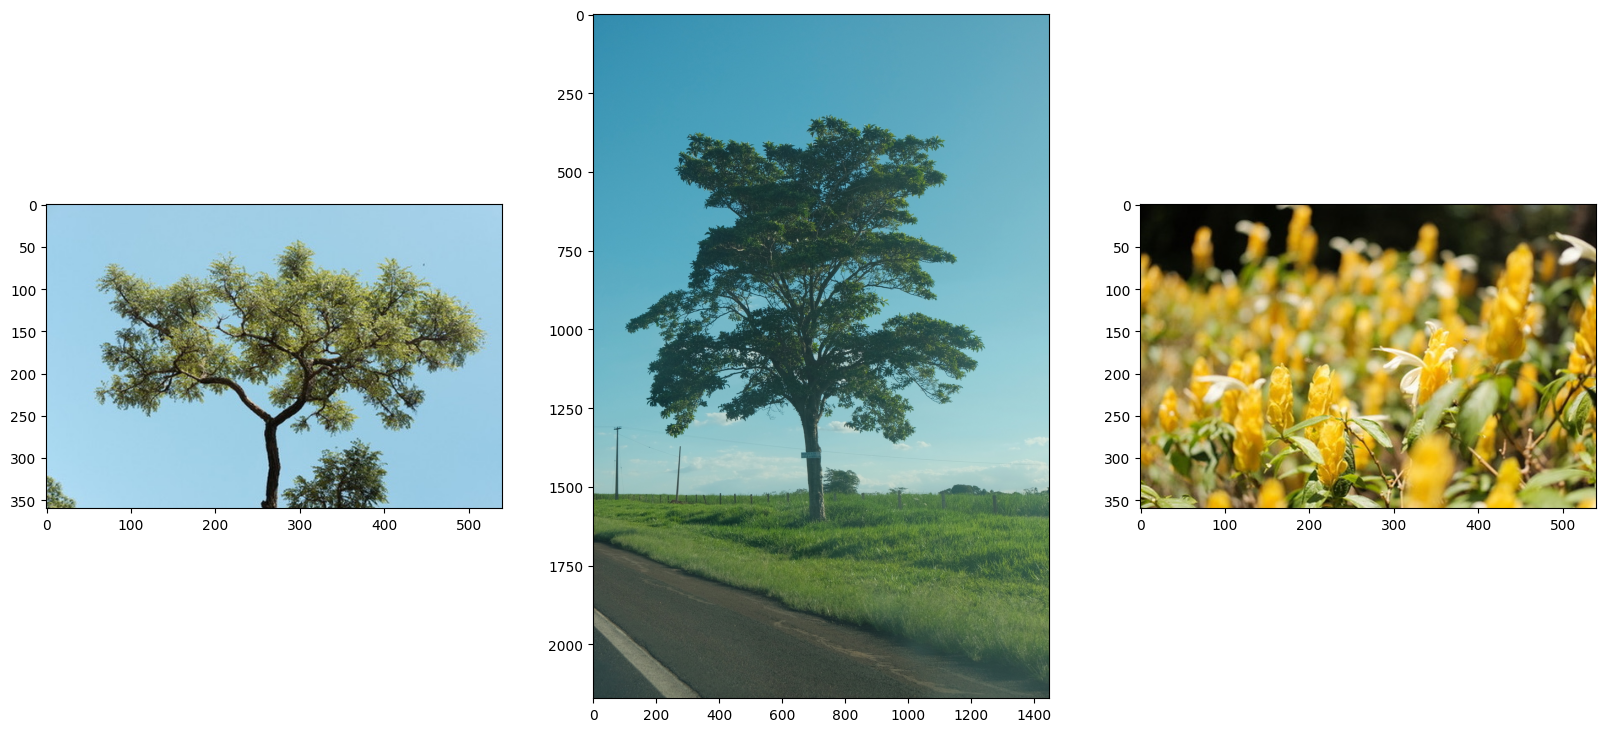

In [3]:
img1 = imageio.imread("1.jpeg")
img2 = imageio.imread("2.jpeg")
img3 = imageio.imread("3.jpeg")

plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.imshow(img1)
plt.subplot(132)
plt.imshow(img2)
plt.subplot(133)
plt.imshow(img3)

In [4]:
def global_histogram(img, bins):
    # r = bw_histogram(img[..., 0], bins)
    # g = bw_histogram(img[..., 1], bins)
    # b = bw_histogram(img[..., 2], bins)
    r, _ = np.histogram(img[..., 0], bins=range(bins))
    g, _ = np.histogram(img[..., 1], bins=range(bins))
    b, _ = np.histogram(img[..., 2], bins=range(bins))
    
    return np.concatenate([r, g, b]).astype(float)/(img.shape[0]*img.shape[1])

def bw_histogram(img, bins):
    range_bins = 256//bins
    hist = np.zeros((bins,))
    for idx, i in enumerate(range(0, 256, range_bins)):
        a = (img > i)
        b = img < (i+range_bins)
        hist[idx] = (a & b).sum()
        
        hist[idx] /= img.shape[0] * img.shape[1]
    return hist

In [5]:
rgbh1 = global_histogram(img1, bins=16)
rgbh2 = global_histogram(img2, bins=16)
rgbh3 = global_histogram(img3, bins=16)

In [6]:
rgbh1

array([3.34362140e-04, 2.57201646e-05, 6.68724280e-05, 8.74485597e-05,
       9.77366255e-05, 7.71604938e-05, 8.23045267e-05, 1.08024691e-04,
       1.90329218e-04, 1.54320988e-04, 2.05761317e-04, 3.60082305e-04,
       4.26954733e-04, 4.93827160e-04, 1.15226337e-03, 5.14403292e-06,
       2.57201646e-05, 1.54320988e-05, 4.11522634e-05, 4.62962963e-05,
       4.62962963e-05, 3.60082305e-05, 1.23456790e-04, 1.54320988e-04,
       2.00617284e-04, 2.21193416e-04, 3.60082305e-04, 4.26954733e-04,
       5.81275720e-04, 1.38374486e-03, 1.34259259e-03, 3.80658436e-04,
       3.60082305e-04, 3.34362140e-04, 5.29835391e-04, 5.65843621e-04,
       6.68724280e-04, 8.74485597e-04, 9.72222222e-04, 1.21399177e-03,
       1.25000000e-03, 1.45576132e-03, 1.49691358e-03, 1.48148148e-03,
       3.42078189e-03])

In [7]:
def euclidean_distance(a, b):
    return np.sqrt((a - b)**2).sum()/a.shape[0]

In [8]:
print(euclidean_distance(rgbh1, rgbh2))
print(euclidean_distance(rgbh1, rgbh3))
print(euclidean_distance(rgbh2, rgbh3))

0.00048698495415948903
0.008005829903978053
0.008422433069493182


In [9]:
def luminance(l):
    if len(l.shape) > 2:
        l = 0.2126 * l[:, :, 0] + 0.7152 * l[:, :, 1] + 0.0722 * l[:, :, 2]
        l = l.astype(np.uint8)
    return l

In [10]:
def log_distance(a, b):
    return euclidean_distance(np.log2(a+1), np.log2(b+1))

In [11]:
print(log_distance(rgbh1, rgbh2))
print(log_distance(rgbh1, rgbh3))
print(log_distance(rgbh2, rgbh3))

0.00070207691203704
0.011468537840365115
0.012069118730048263


In [12]:
rgbh1, _ = np.histogram(luminance(img1), bins=range(16), density=True)
rgbh2, _ = np.histogram(luminance(img2), bins=range(16), density=True)
rgbh3, _ = np.histogram(luminance(img3), bins=range(16), density=True)
print(log_distance(rgbh1, rgbh2))
print(log_distance(rgbh1, rgbh3))
print(log_distance(rgbh2, rgbh3))

0.09857131777296715
0.061242811907493346
0.1358996868453394


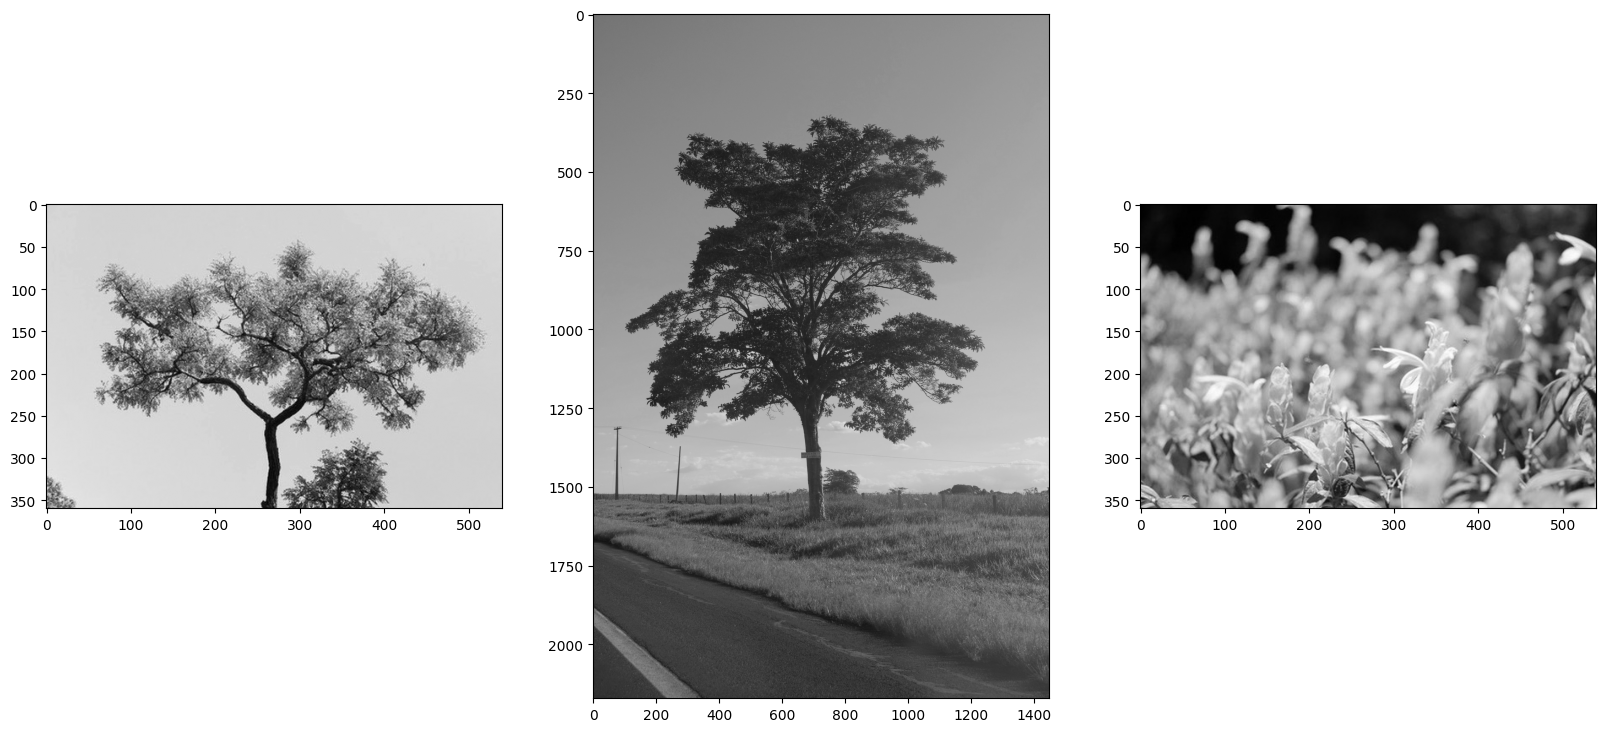

In [13]:


plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.imshow(luminance(img1), cmap='gray')
plt.subplot(132)
plt.imshow(luminance(img2), cmap='gray')
plt.subplot(133)
plt.imshow(luminance(img3), cmap='gray')

In [28]:
import skimage.feature

def lbp_features(img, points, radius, n_bins):
    img1_bw = luminance(img)
    lbp = skimage.feature.local_binary_pattern(img1_bw, P=points, R=radius)
    hist, _ = np.histogram(lbp, bins=n_bins, density=True)
    return hist

In [37]:
lbp1 = lbp_features(img1, 8, 2, 256)
lbp2 = lbp_features(img2, 8, 2, 256)
lbp3 = lbp_features(img3, 8, 2, 256)

In [38]:
print(euclidean_distance(lbp1, lbp2))
print(euclidean_distance(lbp1, lbp3))
print(euclidean_distance(lbp2, lbp3))

0.0013113204274153123
0.0039791011054627606
0.004248731666800298
